In [2]:
from tensorflow.keras.datasets.mnist import load_data
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Input, Flatten, Dense, Dropout
from tensorflow.keras.models import Model

In [3]:
#display the loaded data
def display_img(img_set,title_set):
  n = len(title_set)
  for i in range(n):
    plt.subplot(3,3,i+1)
    plt.imshow(img_set[i],cmap = 'gray')
    plt.title(title_set[i])
  plt.show()

  plt.close()

trainX.shape: (60000, 28, 28), trainY.shape: (60000,), testX.shape: (10000, 28, 28), testY.shape: (10000,)
trainX.dtype: uint8, trainY.dtype: uint8, testX.dtype: uint8, testY.dtype: uint8
trainX.Range: 255 - 0, testX.Range: 255 - 0
[5 0 4 1 9 2 1 3 1]


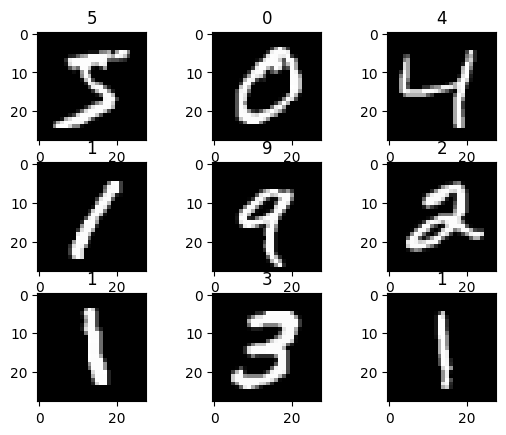

In [4]:
#load data
(trainX,trainY),(testX,testY) = load_data()

# Investigate loaded data
print('trainX.shape: {}, trainY.shape: {}, testX.shape: {}, testY.shape: {}'.format(trainX.shape, trainY.shape, testX.shape, testY.shape))
print('trainX.dtype: {}, trainY.dtype: {}, testX.dtype: {}, testY.dtype: {}'.format(trainX.dtype, trainY.dtype, testX.dtype, testY.dtype))
print('trainX.Range: {} - {}, testX.Range: {} - {}'.format(trainX.max(), trainX.min(), testX.max(), testX.min()))
print(trainY[:9])
#display some loaded image data
display_img(trainX[:9],trainY[:9])

#for better accuracy the data normalization is needed
#data normalization
trainX = trainX / 255.0
testX = testX / 255.0


In [5]:
# Turn 2D images into 3D so that trainX and TrainY will be 4D since Convolutional layer takes 4D data as input.
trainX = np.expand_dims(trainX, axis = -1)
testX = np.expand_dims(testX, axis = -1)

# Investigate updated x
print('trainX.shape: {}, testX.shape: {})'.format(trainX.shape, testX.shape))
print('trainX.dtype: {}, testX.dtype: {}'.format(trainX.dtype, testX.dtype))
print('trainX.Range: {} - {}, testX.Range: {} - {}'.format(trainX.max(), trainX.min(), testX.max(), testX.min()))
print(trainY[:2])
# Turn y into one-hot-encoding, so that we can use 10 neurons in the output layer
trainY = to_categorical(trainY, num_classes = 10)
testY = to_categorical(testY, num_classes = 10)

# Investigate updated y
print('trainY.shape: {}, testY.shape: {})'.format(trainY.shape, testY.shape))
print('trainY.dtype: {}, testX.dtype: {}'.format(trainY.dtype, testY.dtype))
print(trainY[:2])

trainX.shape: (60000, 28, 28, 1), testX.shape: (10000, 28, 28, 1))
trainX.dtype: float64, testX.dtype: float64
trainX.Range: 1.0 - 0.0, testX.Range: 1.0 - 0.0
[5 0]
trainY.shape: (60000, 10), testY.shape: (10000, 10))
trainY.dtype: float64, testX.dtype: float64
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [6]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input,Conv2D,MaxPooling2D,Flatten,Dense,Dropout

#input layer
inputs = Input(shape=(28,28,1),name='InputLayer')

#first convolutional layer block
x = Conv2D(filters=32,kernel_size=(3,3),activation='relu',padding='same')(inputs)
x = MaxPooling2D(pool_size=(2,2))(x)
x = Dropout(0.3)(x)

#second convolution block
x = Conv2D(filters=64,kernel_size=(3,3),activation='relu',padding='same')(x)
x = MaxPooling2D(pool_size=(2,2))(x)
x = Dropout(0.3)(x)

#third convolution block
x = Conv2D(filters=128,kernel_size=(3,3),activation='relu',padding='same')(x)
x = MaxPooling2D(pool_size=(2,2))(x)
x = Dropout(0.3)(x)

#fully connected layers
x = Flatten()(x)
x = Dense(128,activation='relu')(x)
x = Dropout(0.3)(x)
x = Dense(64,activation='relu')(x)
x = Dropout(0.3)(x)

#output layer
outputs = Dense(10,activation='softmax',name='outputLayer')(x)

#model creation
model = Model(inputs=inputs,outputs=outputs,name='CNN-Multi-Classifier')
#model summary
model.summary()


Model: "CNN-Multi-Classifier"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ InputLayer (InputLayer)         │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 7, 7, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 3, 3, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 3, 3, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ outputLayer (Dense)             │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 249,162 (973.29 KB)

 Trainable params: 249,162 (973.29 KB)

 Non-trainable params: 0 (0.00 B)

In [7]:

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
history = model.fit(trainX,trainY,batch_size=128,epochs=10,validation_split=0.1)

Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 42s 90ms/step - accuracy: 0.6371 - loss: 1.0325 - val_accuracy: 0.9807 - val_loss: 0.0629
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 39s 92ms/step - accuracy: 0.9566 - loss: 0.1527 - val_accuracy: 0.9883 - val_loss: 0.0404
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 40s 94ms/step - accuracy: 0.9694 - loss: 0.1064 - val_accuracy: 0.9893 - val_loss: 0.0355
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 37s 88ms/step - accuracy: 0.9762 - loss: 0.0861 - val_accuracy: 0.9907 - val_loss: 0.0337
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 38s 90ms/step - accuracy: 0.9807 - loss: 0.0728 - val_accuracy: 0.9910 - val_loss: 0.0307
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 38s 90ms/step - accuracy: 0.9825 - loss: 0.0646 - val_accuracy: 0.9903 - val_loss: 0.0368
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 41s 97ms/step - accuracy: 0.9829 - loss: 0.0599 - val_accuracy: 0.9913 - val_loss: 0.0288
Epoch 8/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 38s 91ms/step - accuracy: 0.9834 - loss: 0.0605 - 

In [8]:
# Evaluate model performance
result = model.evaluate(testX, testY)
print("Test Loss:", result[0])
print("Test Accuracy:", result[1])

# Predict Y values
predictY = model.predict(testX)

print('OriginalY   PredictedY')
print('=========   ==========')
for i in range(10):
  print(np.argmax(testY[i]), '\t\t', np.argmax(predictY[i]))
#The np.argmax() function in NumPy is used to find the index of the maximum value


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9919 - loss: 0.0262
Test Loss: 0.020736949518322945
Test Accuracy: 0.9936000108718872
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step
OriginalY   PredictedY
=========   ==========
7 		 7
2 		 2
1 		 1
0 		 0
4 		 4
1 		 1
4 		 4
9 		 9
5 		 5
9 		 9


[0.8291481733322144, 0.9616666436195374, 0.9719814658164978, 0.9778333306312561, 0.979962944984436, 0.9824259281158447, 0.9835000038146973, 0.9845740795135498, 0.9859814643859863, 0.9867036938667297]


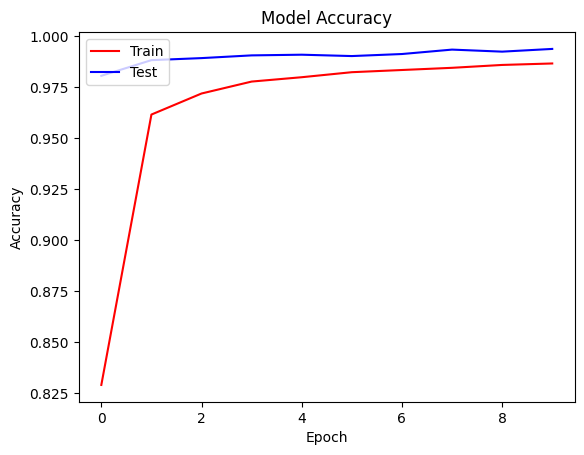

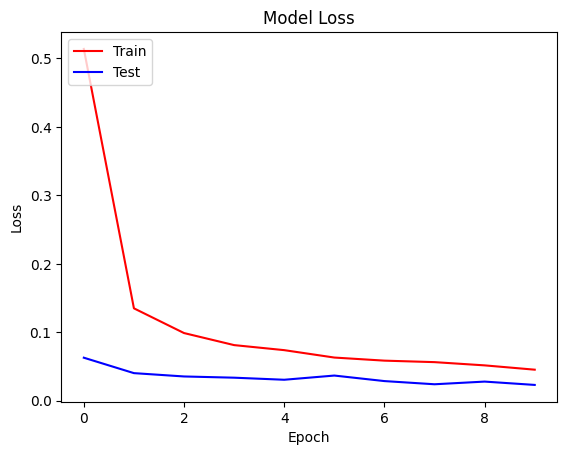

In [9]:
import matplotlib.pyplot as plt
print(history.history['accuracy'])
# Plot training & validation accuracy
plt.plot(history.history['accuracy'],color='r')# Access training accuracy over epochs
plt.plot(history.history['val_accuracy'],color='b')# Access validation accuracy over epochs
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss
plt.plot(history.history['loss'],color='r')# Access loss during training
plt.plot(history.history['val_loss'],color='blue')# Access validation loss
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
